# Dataset 3: Covid-19 Dataset

The dataset contains daily level information on the number of 2019-nCoV affected cases across the globe.
It represents early outbreak stages, relating date, time and location variables with relevant information of the different COVID cases over time.


[Source](https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Coronavirus)

## 1. Initial Exploration of the Dataset

### 1.1 Loading the dataset

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


#### 1.1.1 What I Notice
The column names suggest an interesting data structure:
- `ObservationDate` can be used to analyze the evolution of COVID-19 cases over time.
- The `Country/Region` column appears to indicate the regions where the initial outbreaks occurred, which makes sense.
- A few natural questions arise when examining why the data looks the way it does:
  - How often does the time interval change in this dataset? What is the frequency of recorded COVID-19 events?
  - Are there any unexpected regions showing events, particularly those located far from the initial outbreak areas?

  



## 1.2 Dataset structure: Inspection methods

In [27]:
# Checking basic information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4247 entries, 0 to 4246
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              4247 non-null   int64  
 1   ObservationDate  4247 non-null   object 
 2   Province/State   2746 non-null   object 
 3   Country/Region   4247 non-null   object 
 4   Last Update      4247 non-null   object 
 5   Confirmed        4247 non-null   float64
 6   Deaths           4247 non-null   float64
 7   Recovered        4247 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 265.6+ KB


### 1.2.1 What `df.info()` Uncovers  
- The dataset contains **4,247 rows × 8 columns**.  
- It includes a mix of both decimal and integer values.  
- The `Province/State` column has a substantial number of null values, while all other columns are complete with no missing data.  
- Approximately half of the columns are string (categorical) variables.
- `ObservationDate` needs to be transformed into a pandas datetime object so I can create time-based analysis.

### 1.2.2 Impact on Dataset Choice  
- Handling the missing values in the `Province/State` column will be an important decision, as they account for a significant portion of the dataset (**around 40% of rows**).  
- Overall, the dataset is solid and relatively straightforward to work with. Despite its simplicity, it offers opportunities for meaningful and insightful analysis.  

## 1.3 Summary Statistics

Describing the dataset statistical values using two different `describe()` methods.

In [28]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,4247.000000,4247.000000,4247.000000,4247.000000
mean,2124.000000,586.884624,17.530257,187.914528
std,1226.147626,5033.596411,190.278672,1976.388824
min,1.000000,0.000000,0.000000,0.000000
25%,1062.500000,1.000000,0.000000,0.000000
50%,2124.000000,9.000000,0.000000,1.000000
75%,3185.500000,99.500000,1.000000,16.000000
max,4247.000000,67707.000000,2986.000000,45235.000000


There is an important note to make here. In order to get clear results, the numerical columns we are analyzing need to be grouped by the location as considering them as a whole makes no sense when looking for cumulative COVID events.

To do this, I need to:
- Understand the effect missing `Province / State` values cause on how the events are being cumulated. Do both columns depend on each other?
- Once I do that, I can confirm how events evolve over time, (temporal DateTime transformation may be necessary) and confirm the behaviour of cumulation of events in the dataset

In [29]:
df[df['Province/State'].isnull()]['Country/Region'].value_counts()

Country/Region
Japan          47
Thailand       47
South Korea    47
Singapore      46
Vietnam        46
               ..
Bulgaria        1
Maldives        1
Bangladesh      1
Moldova         1
Paraguay        1
Name: count, Length: 104, dtype: int64

Several events have no associated `Province/State`. To better understand how values are being accumulated, the analysis will focus on cumulative cases at the **country level only**.  

In [30]:
#df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df.sort_values(by=['Country/Region','ObservationDate']).head(30).drop(columns='Province/State')

,SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
2663,2664,02/28/2020,Azerbaijan,2020-02-28T15:03:26,1.0,0.0,0.0
2258,2259,02/24/2020,Afghanistan,2020-02-24T23:33:02,1.0,0.0,0.0
2351,2352,02/25/2020,Afghanistan,2020-02-24T23:33:02,1.0,0.0,0.0
2452,2453,02/26/2020,Afghanistan,2020-02-24T23:33:02,1.0,0.0,0.0
2556,2557,02/27/2020,Afghanistan,2020-02-24T23:33:02,1.0,0.0,0.0
2664,2665,02/28/2020,Afghanistan,2020-02-24T23:33:02,1.0,0.0,0.0
2782,2783,02/29/2020,Afghanistan,2020-02-24T23:33:02,1.0,0.0,0.0
2910,2911,03/01/2020,Afghanistan,2020-02-24T23:33:02,1.0,0.0,0.0
3041,3042,03/02/2020,Afghanistan,2020-02-24T23:33:02,1.0,0.0,0.0
3189,3190,03/03/2020,Afghanistan,2020-02-24T23:33:02,1.0,0.0,0.0


This seems to show how events change over time, and understand a logical trend from one day to another, grouping by country. 
So now, we can use the `groupby()` method to get a `describe()` output that does make sense.

In [61]:
# Getting the most relevant countries first
desc = (
    df.groupby("Country/Region")[["Confirmed"]]
      .describe()
)

desc_top_confirmed = desc.sort_values(("Confirmed", "max"), ascending=False)

desc_top_confirmed.head(10)

Confirmed                                                \
                   count         mean          std   min    25%    50%   
Country/Region                                                           
Mainland China    1451.0  1593.419711  8500.005290   0.0   67.0  162.0   
Italy               38.0   922.131579  1791.580371   2.0    3.0    3.0   
South Korea         47.0  1235.702128  2213.743838   1.0   15.0   28.0   
Iran                19.0  1579.105263  2138.518488   2.0   52.0  388.0   
France              45.0    98.022222   238.305332   2.0    6.0   12.0   
Germany             41.0   105.268293   229.833312   4.0   13.0   16.0   
Others              31.0   506.193548   250.024055  61.0  251.5  634.0   
Spain               37.0    69.567568   153.881184   1.0    2.0    2.0   
Japan               47.0   112.957447   135.258200   1.0   20.0   43.0   
Switzerland         13.0    91.076923   112.001831   1.0    8.0   42.0   

                                  
                    75%      max  
Country/Region                    
Mainland China   481.00  67707.0  
Italy            829.75   7375.0  
South Korea     1119.00   7314.0  
Iran            2629.00   6566.0  
France            18.00   1126.0  
Germany           46.00   1040.0  
Others           705.00    706.0  
Spain             32.00    673.0  
Japan            179.50    502.0  
Switzerland      114.00    337.0

In [62]:
desc = (
    df.groupby("Country/Region")[["Deaths"]]
      .describe()
)

desc_top_confirmed = desc.sort_values(("Deaths", "max"), ascending=False)

desc_top_confirmed.head(10)

Deaths                                                      
                 count       mean         std  min   25%   50%   75%     max
Country/Region                                                              
Mainland China  1451.0  49.068918  322.857286  0.0   0.0   1.0   3.0  2986.0
Italy             38.0  34.684211   78.270531  0.0   0.0   0.0  20.0   366.0
Iran              19.0  54.210526   55.712136  2.0  10.0  34.0  84.5   194.0
South Korea       47.0   7.702128   13.725436  0.0   0.0   0.0  11.0    50.0
France            45.0   1.711111    3.500794  0.0   0.0   1.0   2.0    19.0
Spain             37.0   1.027027    3.287066  0.0   0.0   0.0   0.0    17.0
US               783.0   0.114943    1.076163  0.0   0.0   0.0   0.0    17.0
Japan             47.0   1.617021    2.279905  0.0   0.0   1.0   1.5     6.0
Others            31.0   2.677419    2.638018  0.0   0.0   2.0   6.0     6.0
Iraq              15.0   1.133333    1.884776  0.0   0.0   0.0   2.0     6.0

In [63]:
desc = (
    df.groupby("Country/Region")[["Recovered"]]
      .describe()
)

desc_top_confirmed = desc.sort_values(("Recovered", "max"), ascending=False)

desc_top_confirmed.head(10)

Recovered                                                   \
                   count        mean          std  min  25%   50%     75%   
Country/Region                                                              
Mainland China    1451.0  538.110269  3353.265770  0.0  2.0  48.0  201.50   
Iran                19.0  371.473684   606.780975  0.0  0.0  73.0  421.50   
Italy               38.0   77.921053   171.254889  0.0  0.0   0.0   45.75   
South Korea         47.0   17.936170    31.664961  0.0  0.0   7.0   22.00   
Singapore           46.0   28.782609    30.673125  0.0  0.0  17.5   59.75   
Japan               47.0   15.723404    18.733488  0.0  1.0   9.0   22.00   
Hong Kong           47.0   11.404255    16.984212  0.0  0.0   1.0   21.50   
Others              31.0    6.903226    11.869723  0.0  0.0   1.0   10.00   
Thailand            47.0   14.085106    10.402403  0.0  5.0  12.0   22.00   
Spain               37.0    2.756757     6.672520  0.0  0.0   2.0    2.00   

                         
                    max  
Country/Region           
Mainland China  45235.0  
Iran             2134.0  
Italy             622.0  
South Korea       135.0  
Singapore          78.0  
Japan              76.0  
Hong Kong          58.0  
Others             40.0  
Thailand           31.0  
Spain              30.0

In [31]:
categorical_cols = df.select_dtypes(exclude='number').columns
df[categorical_cols].describe()

,ObservationDate,Province/State,Country/Region,Last Update
count,4247,2746,4247,4247
unique,47,181,111,1190
top,03/08/2020,Anhui,Mainland China,2020-02-01T19:43:03
freq,255,47,1451,63


#### 1.3.1 Interpreting `df.describe()` results
- **SNo**
    - This column is essentially an id that registers each events and uniquely identifies every row. Since the index already satisfies this funcion, then this column will be dropped as it's not providing any information.

- **ObservationDate**
  - Covers a limited window from late January to early March 2020, giving a daily timeline of the early outbreak.
  - Some dates appear very frequently, because the same day is recorded for many different province/country combinations.
  - It refers to the moment in which every specific event took place.

- **Province/State**
  - Contains hundreds of distinct provinces and states, but is missing for many rows, so spatial detail is uneven across countries.
  - The most common provinces are in China, which reflects where the data are most granular and where the earliest focus of reporting was.

- **Country/Region**
  - Includes over a hundred (111) different countries and regions, which allows for truly global comparisons.
  - Mainland China appears far more often than any other country, so its behaviour strongly influences overall summaries.

- **Last Update**
  - Stores the UTC timestamp when each record was last modified, which often differs from `ObservationDate`.
  - High variety in these timestamps shows that rows were updated multiple times as new information arrived or corrections were made.

- **Confirmed**
  - Means are much higher than medians for heavily affected countries, indicating a right‑skewed distribution with a few days of very large case counts.
  - Maximum values are extremely high (tens of thousands for Mainland China), capturing the sharp peaks reached by the end of the period.

- **Deaths**
  - For many countries the median number of deaths per day is 0, showing that they spent much of this early period without fatalities.
  - A small number of days with large death counts (hundreds or more in places like Mainland China and Italy) push the mean and the maximum far above the typical daily values.

- **Recovered**
  - Early in the timeline, recoveries are rare, so lower quartiles and medians sit near zero, especially outside China.
  - Later spikes in recoveries produce very large maxima and high means for some countries, suggesting that many patients recovered in a short window once enough time had passed since infection.
  - At first, these spikes were very confusing, but relating this information to the context of the dataset, these findings make way more sense.


## 1.4 Missing Values


In [32]:
df.isna().sum()

SNo                   0
ObservationDate       0
Province/State     1501
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

#### 1.4.1 Interpreting missing values
Rows with missing `Province/State` values are likely to be filtered out, since there is no reliable assumption that can be made to impute them. The proportion of missing entries is significant, which reduces the total number of rows. However, the frequency of recorded events over the three-month period, combined with the dataset’s level of detail (**4,247 rows for 3 months of data**), helps maintain consistency and reliability in the analysis.  

#### 1.4.2 Impact on dataset choice
The missing values in the `Province/State` column are managable and dropable in case is needed. No need to worry too much about it. It is also important to understand that depending on which location analysis I would like to perform, my dataset will limit the scope and I might have to consider countries only for this kind of analysis.


## 1.5 Check for Duplicate Rows

In [70]:
df.duplicated().sum()

np.int64(0)

In [71]:
df[df.duplicated(keep = False)].sort_values(list(df.columns))

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered


#### 1.5.1 Interpreting duplicates
- I don't have any duplicated row for this dataset, therefore this is not going to be a big concern.

## 1.6 Simple Visual Exploration of Key Columns

Based on my findings when analyzing the describe() methods outputs, there are some columns I would like to take a look into for both numerical and categorical types. I'm going to use the `hist()` method for this purpose, as well as bar charts that represent the distribution of categorical features.

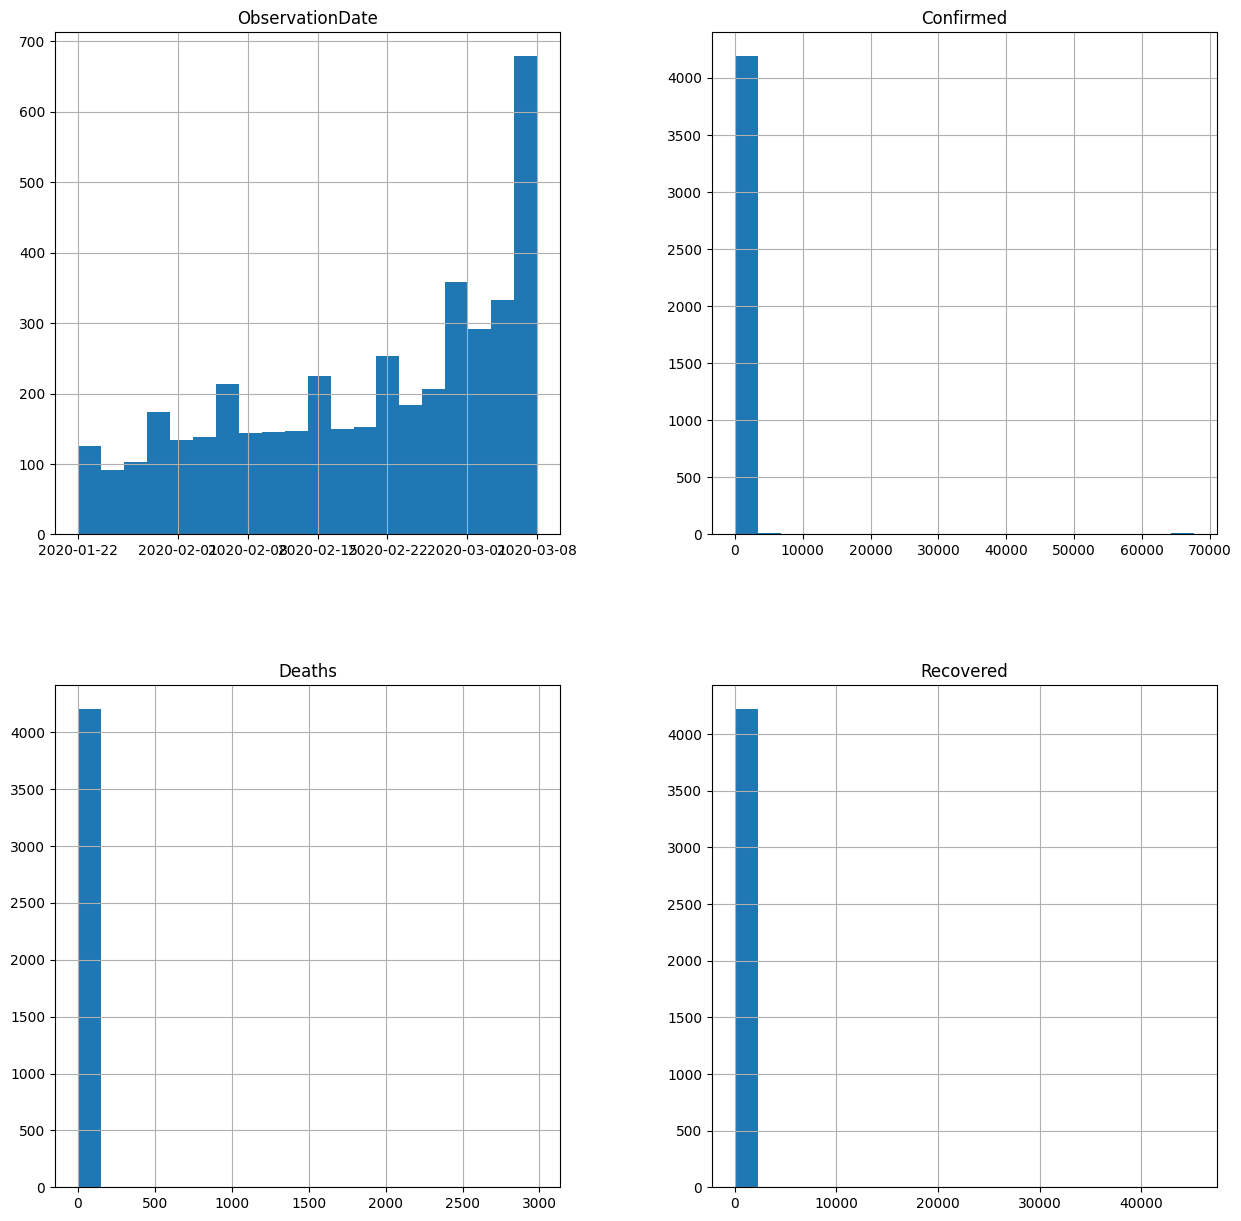

In [72]:
# Not taking Overall rank into account for this as discussed previously
df.drop(columns='SNo').hist(bins=20,figsize=(15,15))
plt.show()

#### 1.6.1 Interpreting Numerical Column Distributions

- The `ObservationDate` histograms shows something surprising, most of captured COVID events took place at the end of the 3 month period, (first days of march) This is an important finding that shows us that our data is clustered at the end of the included time.
- For `Confirmed`, almost all bars are crammed near zero with a very long empty stretch toward the right, indicating that on most days and in most places reported case counts were still relatively low, while a few extreme daily counts (in heavily affected countries) create very large maximum values that are not visible at this scale. Further `groupby()` and more specific analysis is needed to determine the true nature of the COVID cases.
- The `Deaths` distribution follows a similar pattern: the vast majority of observations correspond to zero or very few deaths, and only a small fraction of days reach high fatality counts, which explains why medians are zero for many countries but the overall maximum is in the thousands.
- The Recovered histogram is again strongly right‑skewed, with many days showing no or very few recoveries and a handful of days with huge spikes; this supports the idea that recoveries lag behind infections and then jump sharply once patients complete their course of illness.


Overall, and as I explained at the beginning, in order to fully understand the evolution of the events we are analyzing using this dataset, grouping by an appropiate location and more specific visuals are needed to fully complete the analysis process and gather conclusions out of the enhanced report.


## 1.7 Categorical Variables: Quick Counts

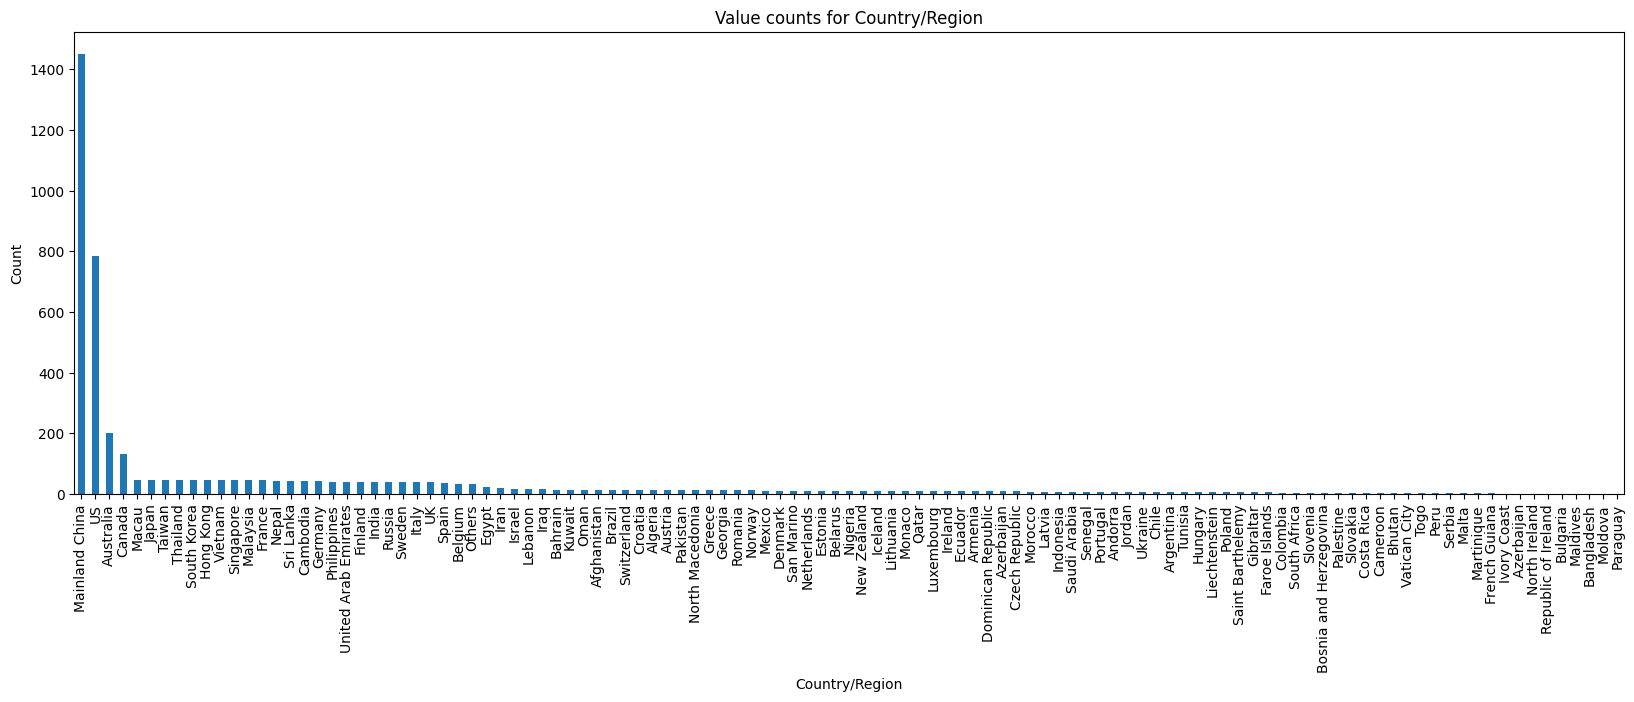

In [ ]:
df_countplots = df['Country/Region']

# Create a figure with custom size
plt.figure(figsize=(20, 6))  # width=12, height=6 in inches

# Plot the value counts
ax = df_countplots.value_counts().plot(kind="bar")

# Customize labels and title
ax.set_title("Value counts for Country/Region")
ax.set_xlabel("Country/Region")
ax.set_ylabel("Count")

plt.show()


### 1.7.1 Interpreting Categorical Column Count Plots  
- The only categorical column that makes sense to visualize with a bar chart is `Country/Region`, given the high level of missingness in `Province/State`.  
- China, the United States, Australia, and Canada appear as the countries with the largest number of reported COVID-19 cases during this period.  
- The distribution suggests that, while the virus originated in China, its impact extended beyond geographically proximate regions to also affect major global economies.

## 1.8 Initial Questions Section: Early Thoughts on Possible Analysis Directions

- How did the outbreak unfold over time in the early months of 2020? In particular, does the sharp concentration of events in late February and early March indicate an exponential rise, reporting delays, or both?

- Which countries were most affected in this early window when we look at confirmed, deaths, and recovered separately, and how different is the pattern if we rank by deaths instead of confirmed cases?

- For a small set of key countries (for example Mainland China, Italy, Iran, South Korea, Spain, and the US), how do their daily curves compare: who saw cases first, who reached high death counts fastest, and who started to see recoveries?

- How large is the gap between confirmed and recovered cases over time, and can this gap be used as a rough proxy for the burden of active cases during the early phase of the pandemic?

- Do countries with earlier first cases necessarily experience earlier or higher peaks in deaths, or do some appear to control the situation better despite early exposure?

- Are there visible signs of under‑reporting or sudden data corrections in the time series (for example, abrupt jumps on a single day), and how might those quirks affect any trend or forecasting analysis built on this dataset?


## 1.9 Final Evaluation

### 1.9.1 Data Quality
- The dataset is relatively clean: numeric columns (`Confirmed`, `Deaths`, `Recovered`) are properly typed, and there are no obvious missing values in the core fields needed for analysis.
- There is some imbalance in geographic detail (many records for Mainland China, fewer for other countries, and some missing `Province/State` entries), and the time window is short and heavily concentrated toward late February and early March. This imbalance can be explained if we take into account it is normal to have more cases in regions were the outbreak started, or closely related to it, but I still want to consider this for future analysis.
- Update timestamps (`Last Update`) and the strong right‑skew in case counts reveal quirks such as late reporting and sudden jumps, which need to be kept in mind when interpreting trends or fitting models.

### 1.9.2 Appropriateness for Analysis
- The structure (one row per province/country per day, with `ObservationDate` and three key outcome variables) is very suitable for time‑series plots, growth‑curve comparisons, and simple descriptive statistics.
- Because it focuses on the early outbreak phase, the dataset is well suited for questions about “how the pandemic started and escalated,” but not for long‑term or full‑pandemic analyses.


### 1.9.3 Overall Decision
Would I choose this dataset for further analysis?  
**Yes, I would.**

**Reasons**
- It offers a clear, real‑world time series of a major global event, with enough variation across countries and over days to explore meaningful patterns.
- The data quality is good enough that most effort can go into analysis and visualization rather than heavy cleaning or imputation. There are minor issues with missing data that can be handled.
- Its limitations (short time window, skewed distributions) are manageable, and may be actually a normal and expected behavior.

